# Step 1: Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Step 2: Load the Dataset

In [4]:
# Load the Telco Customer Churn dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display the first few rows of the dataset
data.head()

# shap of the data set
data.shape

(7043, 21)

# Step 3: Data Cleaning and Preparation

In [5]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Convert 'TotalCharges' to numeric, handling non-numeric values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(subset=['TotalCharges'], inplace=True)

# Drop irrelevant columns
data.drop(columns=['customerID'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the first few rows of the cleaned dataset
data.head()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Step 4: Exploratory Data Analysis (EDA)

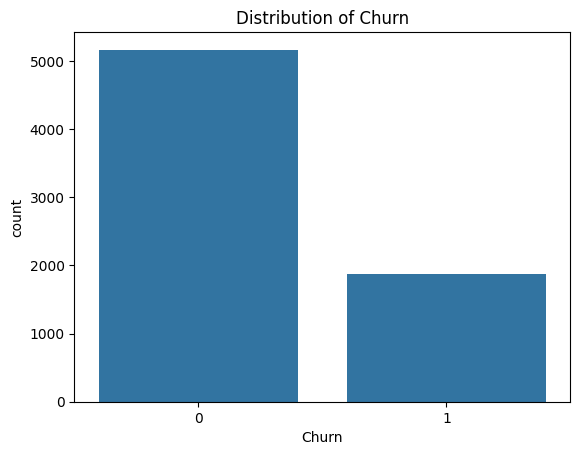

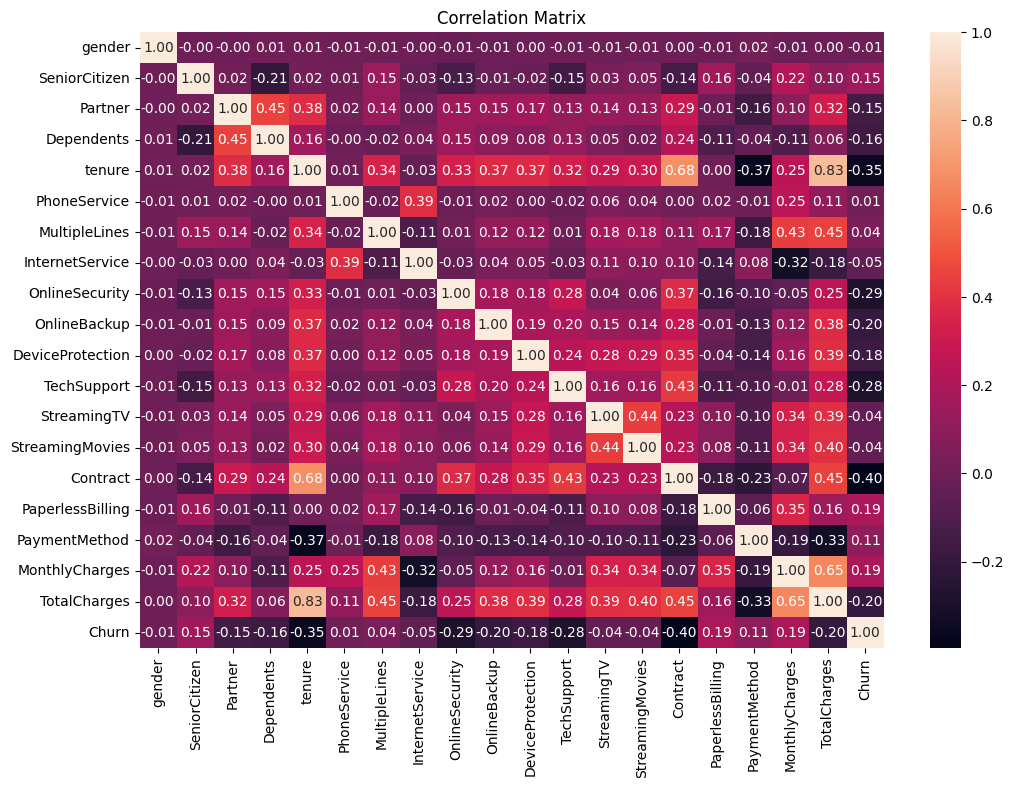

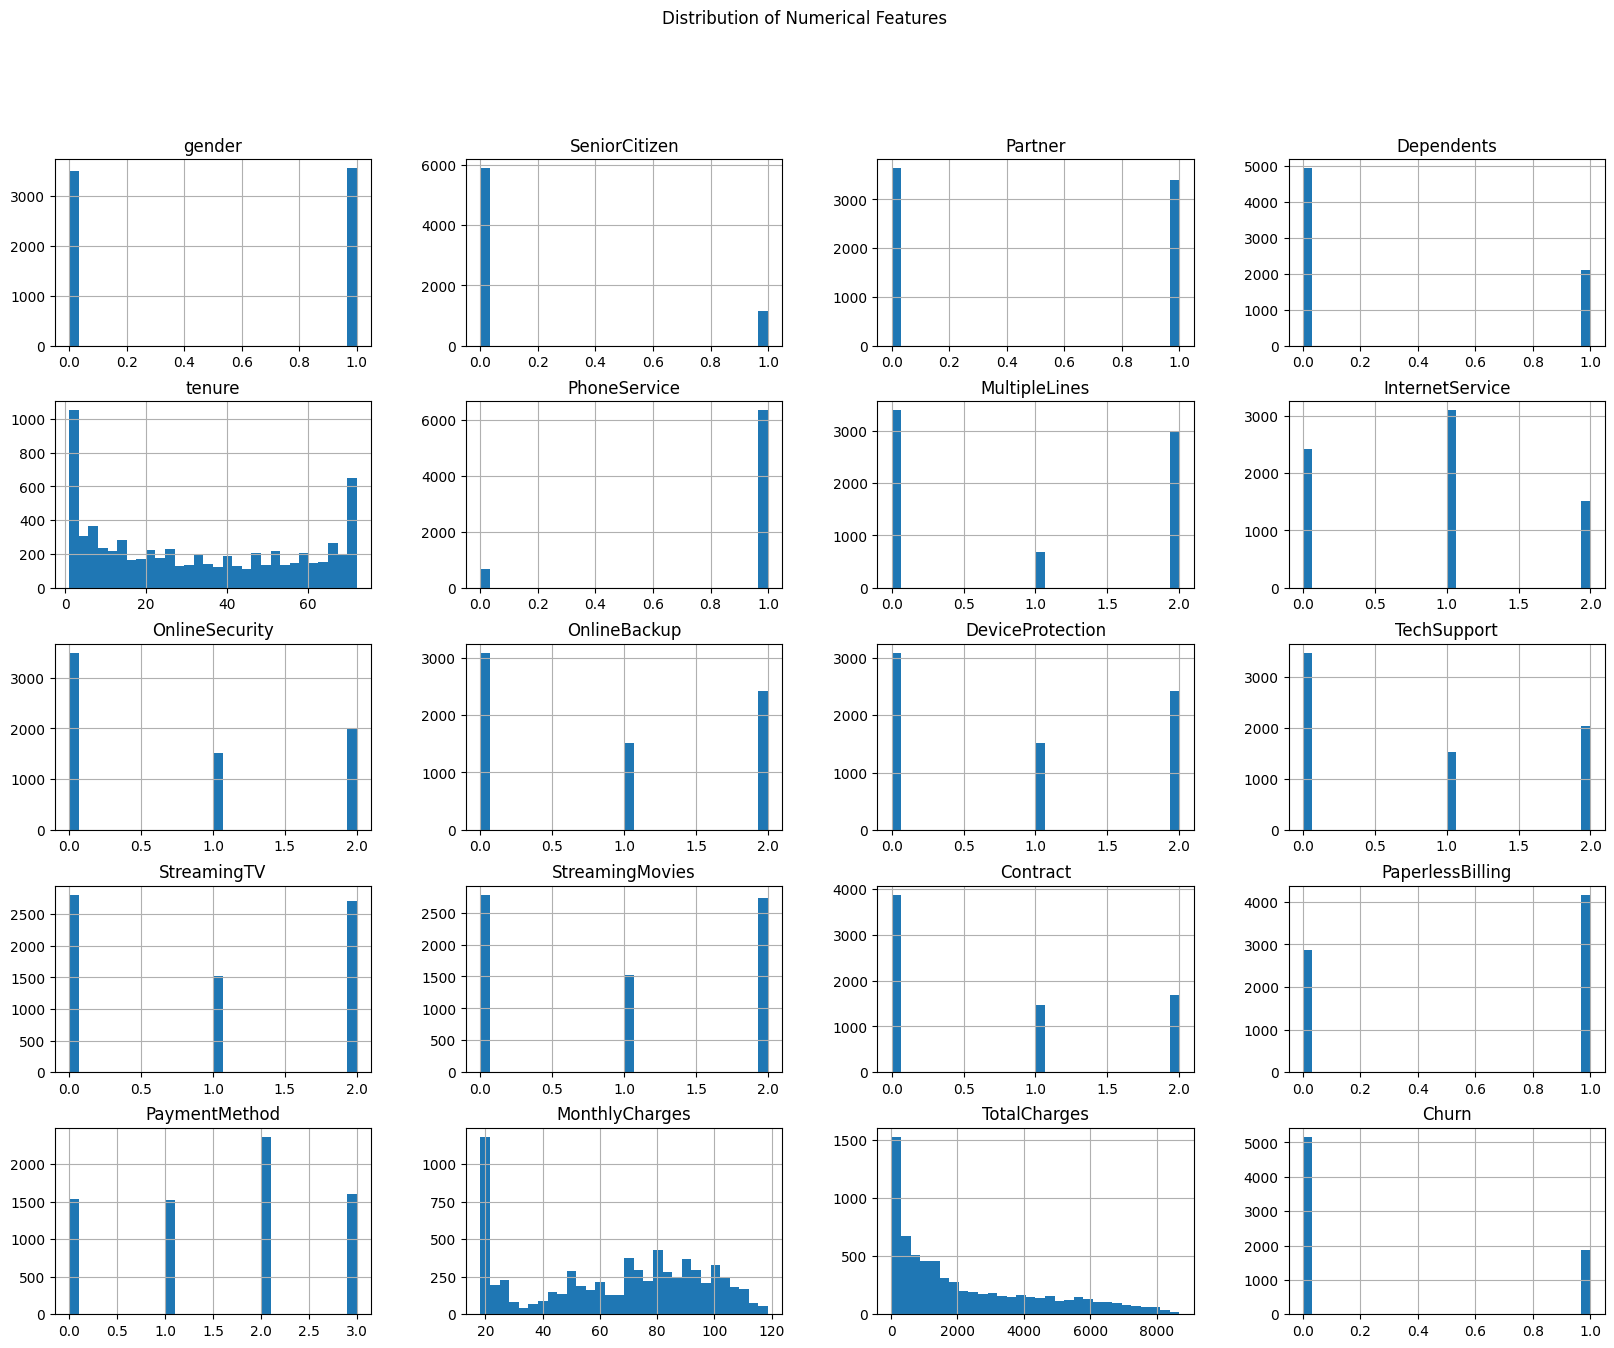

In [6]:
# Plot the distribution of churn
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Distribution of numerical features
data.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution of Numerical Features')
plt.show()


# Step 5: Feature Engineering

In [7]:
# Create new features based on existing ones
data['SeniorCitizen'] = data['SeniorCitizen'].astype('int')
data['TotalServices'] = (data[['PhoneService', 'MultipleLines', 'InternetService', 
                               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                               'TechSupport', 'StreamingTV', 'StreamingMovies']] == 1).sum(axis=1)

# Drop original service columns
data.drop(columns=['PhoneService', 'MultipleLines', 'InternetService', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies'], inplace=True)

# Display the first few rows of the dataset with new features
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServices
0,0,0,1,0,1,0,1,2,29.85,29.85,0,1
1,1,0,0,0,34,1,0,3,56.95,1889.50,0,1
2,1,0,0,0,2,0,1,3,53.85,108.15,1,1
3,1,0,0,0,45,1,0,0,42.30,1840.75,0,1
4,0,0,0,0,2,0,1,2,70.70,151.65,1,2


# Step 6: Split the Data into Training and Testing Sets

In [8]:
# Define features and target variable
X = data.drop(columns='Churn')
y = data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 7: Model Development

Logistic Regression

In [9]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

print(f'Logistic Regression - Accuracy: {accuracy_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1 Score: {f1_log_reg}, ROC AUC: {roc_auc_log_reg}')


Logistic Regression - Accuracy: 0.7860696517412935, Precision: 0.6196721311475409, Recall: 0.5053475935828877, F1 Score: 0.5567010309278351, ROC AUC: 0.6965266525513664


Random Forest

In [10]:
# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f'Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}, ROC AUC: {roc_auc_rf}')


Random Forest - Accuracy: 0.7810945273631841, Precision: 0.6122448979591837, Recall: 0.48128342245989303, F1 Score: 0.5389221556886228, ROC AUC: 0.6854626212009048


# Step 8: Model Evaluation and Comparison

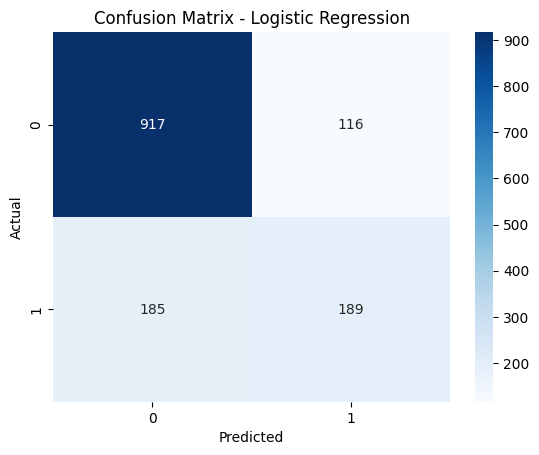

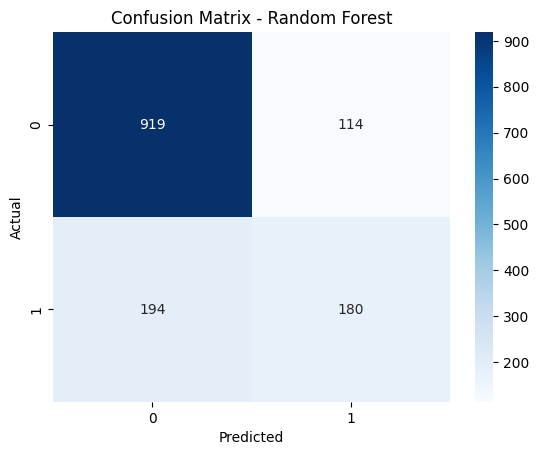

In [11]:
# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Step 9: Data Visualization (using PowerBI)

Export the data for visualization:

In [12]:
# Export the data for visualization
data.to_csv('cleaned_telco_data.csv', index=False)
